In [1]:
%load_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
# Load the houseprices data from Thinkful's database.
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "houseprices"
table_name = "houseprices"

db_url = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"

engine = create_engine(db_url)

prices_df = pd.read_sql_query(f"SELECT * FROM {table_name};", con=engine)

# close the db connetion
engine.dispose()

<IPython.core.display.Javascript object>

In [3]:
prices_df2 = prices_df.copy()
cols_to_drop = [
    "lotfrontage",
    "fireplacequ",
    "fence",
    "alley",
    "miscfeature",
    "poolqc",
    "id",
]
prices_df2.drop(columns=cols_to_drop, inplace=True)
print(
    (prices_df2.isnull().sum() / prices_df2.isnull().count())
    .sort_values(ascending=False)
    .head(14)
)
prices_df2.head()



garagetype      0.055479
garageyrblt     0.055479
garagefinish    0.055479
garagequal      0.055479
garagecond      0.055479
bsmtfintype2    0.026027
bsmtexposure    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrtype      0.005479
masvnrarea      0.005479
electrical      0.000685
yearremodadd    0.000000
dtype: float64


,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [4]:
cols_with_nulls = (
    (prices_df2.isnull().sum() / prices_df2.isnull().count())
    .sort_values(ascending=False)
    .head(13)
    .index
)

prices_df2.dropna(inplace=True)
(prices_df2.isnull().sum() / prices_df2.isnull().count()).sort_values(
    ascending=False
).head(12)

saleprice       0.0
roofstyle       0.0
exterior1st     0.0
exterior2nd     0.0
masvnrtype      0.0
masvnrarea      0.0
exterqual       0.0
extercond       0.0
foundation      0.0
bsmtqual        0.0
bsmtcond        0.0
bsmtexposure    0.0
dtype: float64

<IPython.core.display.Javascript object>

In [5]:
y = prices_df2["saleprice"]
X = prices_df2.select_dtypes(include="number")
X = X.drop("saleprice", axis=1)

<IPython.core.display.Javascript object>

In [6]:
# Split data into train and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<IPython.core.display.Javascript object>

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV


<IPython.core.display.Javascript object>

In [8]:
line = LinearRegression()
line.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

In [9]:
y_test_pred = line.predict(X_test)

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted prices')

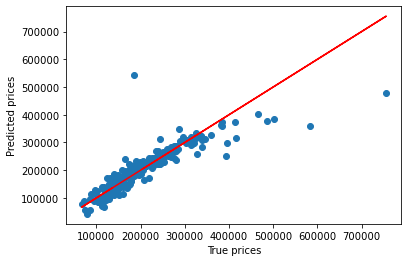

<IPython.core.display.Javascript object>

In [10]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(
    f"Train score: {line.score(X_train, y_train):.3f}\n"
    f"Test: score: {line.score(X_test, y_test):.3f}\n"
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred):.3f}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.3f}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.3f}"
)

Train score: 0.813
Test: score: 0.784
Mean absolute error: 21891.921
MSE: 1657028687.578
RMSE: 40706.617
MAPE: 11.381


<IPython.core.display.Javascript object>

In [12]:
# Ridge
grid = {"alpha": np.logspace(-3, 5, 9)}
ridge_cv = GridSearchCV(Ridge(), grid, cv=5)
ridge_cv.fit(X_train, y_train)
y_test_pred = ridge_cv.best_estimator_.predict(X_test)

<IPython.core.display.Javascript object>

In [13]:
print(
    f"alpha: {ridge_cv.best_estimator_.alpha}\n"
    f"Train score: {ridge_cv.best_estimator_.score(X_train, y_train):.3f}\n"
    f"Test: score: {ridge_cv.best_estimator_.score(X_test, y_test):.3f}\n"
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred):.3f}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.3f}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.3f}"
)

alpha: 10.0
Train score: 0.813
Test: score: 0.785
Mean absolute error: 21760.989
MSE: 1647997727.535
RMSE: 40595.538
MAPE: 11.282


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted prices')

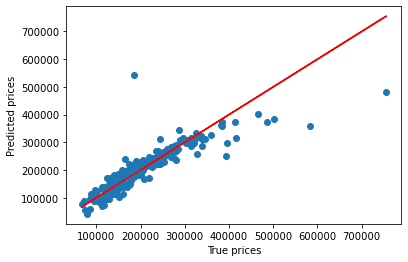

<IPython.core.display.Javascript object>

In [14]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")

In [15]:
# Lasso
lasso_cv = GridSearchCV(Lasso(max_iter=10000), grid, cv=5)
lasso_cv.fit(X_train, y_train)
y_test_pred = lasso_cv.best_estimator_.predict(X_test)

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43167279920.832886, tolerance: 505983142.3124131
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43167602554.84253, tolerance: 505983142.3124131
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43170224584.490234, tolerance: 505983142.3124131
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_m

<IPython.core.display.Javascript object>

In [16]:
print(
    f"alpha: {lasso_cv.best_estimator_.alpha}\n"
    f"Train score: {lasso_cv.best_estimator_.score(X_train, y_train):.3f}\n"
    f"Test: score: {lasso_cv.best_estimator_.score(X_test, y_test):.3f}\n"
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred):.3f}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.3f}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.3f}"
)

alpha: 10.0
Train score: 0.813
Test: score: 0.784
Mean absolute error: 21874.539
MSE: 1655886821.262
RMSE: 40692.589
MAPE: 11.370


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted prices')

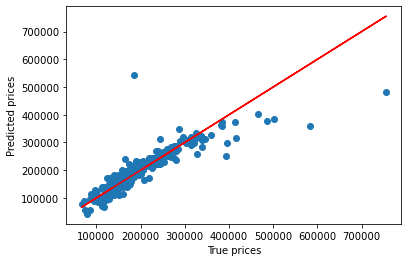

<IPython.core.display.Javascript object>

In [17]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")

In [18]:
# ElasticNet

grid = {"alpha": np.logspace(-3, 5, 9),
        'l1_ratio':[0.25,0.5,0.75, 1]
       }


elastic_cv = GridSearchCV(ElasticNet(max_iter=10000), grid, cv=5, verbose=1)
elastic_cv.fit(X_train, y_train)
y_test_pred = elastic_cv.best_estimator_.predict(X_test)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499366282785.24255, tolerance: 505983142.3124131
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510548218876.7536, tolerance: 534821945.2753646
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466040898896.2755, tolerance: 489192333.4545633
  model = cd_fast.enet_coordinate_

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459675147680.10254, tolerance: 534821945.2753646
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431056438620.90765, tolerance: 489192333.4545633
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434041054960.071, tolerance: 504821520.5827942
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_mo

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599469067749.4493, tolerance: 534821945.2753646
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550702683860.3434, tolerance: 489192333.4545633
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562366954791.6893, tolerance: 504821520.5827942
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_mod

<IPython.core.display.Javascript object>

In [19]:
print(
    f"alpha: {elastic_cv.best_estimator_.alpha}\n"
    f"l1 ratio: {elastic_cv.best_estimator_.l1_ratio}\n"
    f"Train score: {elastic_cv.best_estimator_.score(X_train, y_train):.3f}\n"
    f"Test: score: {elastic_cv.best_estimator_.score(X_test, y_test):.3f}\n"
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred):.3f}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.3f}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.3f}"
)

alpha: 0.1
l1 ratio: 0.75
Train score: 0.812
Test: score: 0.786
Mean absolute error: 21658.893
MSE: 1640641730.371
RMSE: 40504.836
MAPE: 11.197


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted prices')

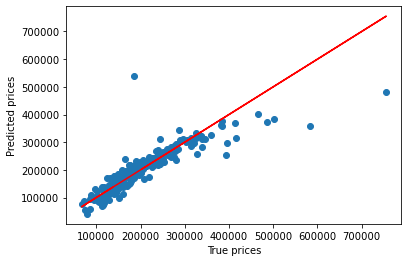

<IPython.core.display.Javascript object>

In [20]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")